In [10]:
import pandas as pd


#open the file 
my_file = open("chr16-2vcf.logfoldchange")

#read the file 
list_of_lines = my_file.readlines()
keys = list_of_lines[0].split(',')
df = pd.DataFrame(columns=keys)

#parse the file
data_all = []
for line in list_of_lines:
    list_temp = line.split(',')
    data_all.append(list_temp)

#convert to dataframe 
df = pd.DataFrame(columns=keys, data = data_all)
df = df.drop(columns="NA|NA|NA")
df2 = df.drop(index = 0)





df2.head()

,,chr,pos,name,ref,alt,8988T|DNase|None,AoSMC|DNase|None,Chorion|DNase|None,CLL|DNase|None,...,NHLF|H4K20me1|None,Osteoblasts|H2AZ|None,Osteoblasts|H3K27ac|None,Osteoblasts|H3K27me3|None,Osteoblasts|H3K36me3|None,Osteoblasts|H3K4me1|None,Osteoblasts|H3K4me2|None,Osteoblasts|H3K4me3|None,Osteoblasts|H3K79me2|None,Osteoblasts|H3K9me3|None
1,0,chr16,209709,,T,C,1.0506e-01,5.1959e-01,4.2439e-01,1.0474e-01,...,-1.9167e-01,4.3917e-02,-1.1248e-01,-3.9686e-02,-2.1899e-02,-8.6271e-02,-1.1048e-01,-1.1721e-01,-7.0250e-02,-8.6975e-02\n


In [11]:
from difflib import SequenceMatcher
import matplotlib.pyplot as plt


def similar(a, b):
    return SequenceMatcher(None, a, b).ratio()

data = df.apply(lambda x: x.tolist(), axis=1)

#get relevant data 
xmap = data[0][6:]
ymap = data[1][6:]

#make feature_map dictionary 
feature_map = pd.read_table("feature_map.txt")
feature_map.head()
#print(xmap)
dict_map = feature_map.set_index('Auto-select').to_dict()[str(0)]
#print(dict_map)
xval = []
yval = []
similarity_index = []
list_of_keys= []
scorekeeper = 0
keys = list(dict_map.keys())
j_value = 0

#match names of features with keys of dictionary. 
#Using Sequence Matcher to match them since the formatting of
#feature_map.txt and output files are inconsistent and throws a KeyError
for i in xmap:
    for j in keys: 
        score = similar(i,j)
        similarity_index.append(score)
        list_of_keys.append(j)
    max_score = max(similarity_index)
    max_index = similarity_index.index(max_score)
    j_value = list_of_keys[max_index]  
    val = dict_map[j_value] 
    xval.append(val)
    i_index = xmap.index(i)
    y_val = ymap[i_index]
    yval.append(y_val)
    score = 0
    similarity_index = []
    list_of_keys = []
    
    


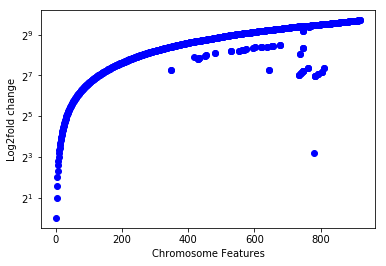

In [12]:
#plot logfoldchange
plt.figure()
plt.plot(xval, yval,'bo')
plt.xlabel("Chromosome Features")
plt.ylabel("Log2fold change")
plt.yscale('log', basey=2)
plt.show()